<a href="https://colab.research.google.com/github/Moavia-Hassan/MS-Data-Science/blob/main/Assignment_3_MoaviaHassan_24_MS_DS_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT 3**
# **Normal, Binomial and Poison Distribution**

---

Q-1 For a particular type of wool the number of ‘crimps per 10cm’ follows a normal
distribution with mean 15.1 and standard deviation 4.79.

a) What proportion of wool would have a ‘crimp per 10 cm’ measurement of 6
or less?

b) If more than 7% of the wool has a ‘crimp per 10 cm’ measurement of 6 or
less, then the wool is unsatisfactory for a particular processing. Is the
wool satisfactory for this processing?

# **Answer**
## a)
This is a standard problem of finding the area under the curve in a normal distribution. To do this, we need to calculate the **Z-score**.

First We will calculate the Z-score to find the "crimp per 10cm" under the area of 6.

The formula for the Z-score is:

z = (x - μ)/σ

z = (6 - 15.1)/4.79

z = -1.90

Using standard normal distributition, We will check correspending result of Z value from the table.

P(X ≤ 6) = P(Z ≤ -1.90) = 0.0287

Hence 2.87% of wool has 6 or fewer crimps per 10cm

---

## b): Is the wool satisfactory for the processing?


Criterion: Unsatisfactory if > 7% has ≤ 6 crimps

Since 2.87% < 7%, the wool is satisfactory for processing.




Z-score: -1.8998
Probability: 0.0287
Percentage: 2.87%
Wool is satisfactory


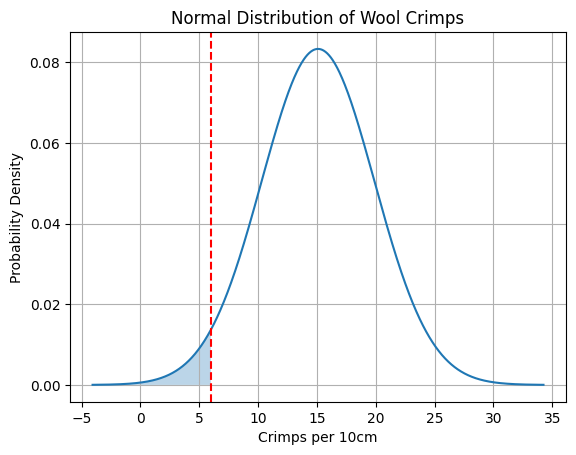

In [ ]:
import scipy.stats as stats
import numpy as np

# Parameters
mean = 15.1
std = 4.79
x = 6

# Calculate probability
z_score = (x - mean) / std
prob = stats.norm.cdf(z_score)

print(f"Z-score: {z_score:.4f}")
print(f"Probability: {prob:.4f}")
print(f"Percentage: {prob*100:.2f}%")
print(f"Wool is {'not ' if prob > 0.07 else ''}satisfactory")

# Visual representation
import matplotlib.pyplot as plt

x_range = np.linspace(mean - 4*std, mean + 4*std, 1000)
plt.plot(x_range, stats.norm.pdf(x_range, mean, std))
plt.fill_between(x_range[:np.where(x_range >= 6)[0][0]],
                stats.norm.pdf(x_range[:np.where(x_range >= 6)[0][0]], mean, std),
                alpha=0.3)
plt.axvline(x=6, color='r', linestyle='--')
plt.title('Normal Distribution of Wool Crimps')
plt.xlabel('Crimps per 10cm')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

Q-2 The finish times for marathon runners during a race are normally distributed
with a mean of 195 minutes and a standard deviation of 25 minutes.

a) What is the probability that a runner will complete the marathon within 3
hours?

b) Calculate to the nearest minute, the time by which the first 8% runners
have completed the marathon.

c) What proportion of the runners will complete the marathon between 3
hours and 4 hours?


# **Answer**
## a)


3×60=180 minutes, we need to find the probability that a runner finishes the marathon in 180 minutes or less.

The Z-score formula is:

z = (x - μ)/σ

Here:

**X=180,  𝜇=195, and  𝜎 = 25**

𝑍 = (180 − 195)/25

Z = −0.6

Look up the **Z-score** in the table

From the Z-table, the proportion corresponding to  Z=−0.6 is approximately 0.2743.

The probability that a runner completes the marathon within 3 hours is **27.43%**.
___

## b)
For first 8% (0.08 probability):

z = -1.405 (using inverse normal)

Time = μ + zσ

= 195 + (-1.405 × 25)

= 159.875

≈ 160 minutes
___
## c)

Between 3 hours (180 min) and 4 hours (240 min):

z1 = (180 - 195)/25 = -0.60

z2 = (240 - 195)/25 = 1.80

P(180 < X < 240) = P(-0.60 < Z < 1.80)

= P(Z < 1.80) - P(Z < -0.60)

= 0.9641 - 0.2743

= 0.6898 or 68.98%

a) Probability within 3 hours: 0.2743
b) Time for first 8%: 160 minutes
c) Proportion between 3-4 hours: 0.6898


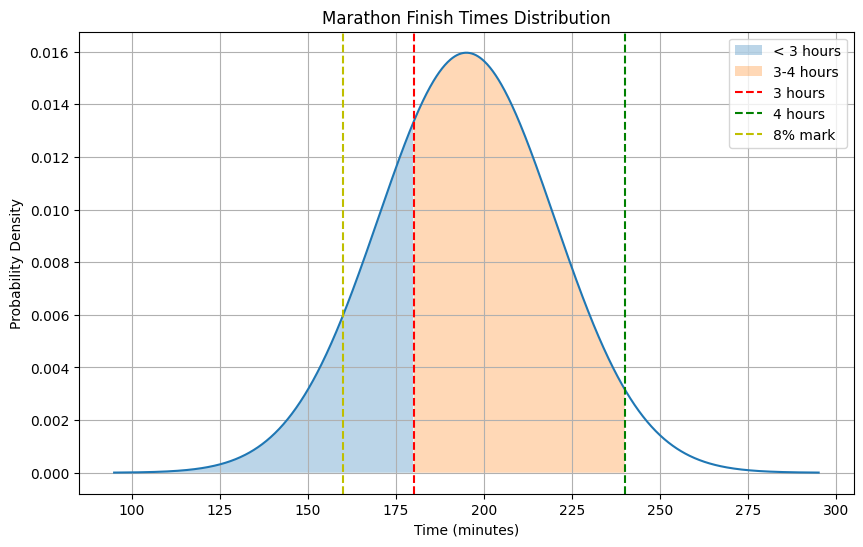

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

mean = 195
std = 25

# a) Probability within 3 hours
prob_3hrs = stats.norm.cdf(180, mean, std)
print(f"a) Probability within 3 hours: {prob_3hrs:.4f}")

# b) Time for first 8%
time_8percent = stats.norm.ppf(0.08, mean, std)
print(f"b) Time for first 8%: {time_8percent:.0f} minutes")

# c) Proportion between 3 and 4 hours
prob_between = stats.norm.cdf(240, mean, std) - stats.norm.cdf(180, mean, std)
print(f"c) Proportion between 3-4 hours: {prob_between:.4f}")

# Visualization
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, stats.norm.pdf(x, mean, std))

# Shade different regions
plt.fill_between(x[x <= 180], stats.norm.pdf(x[x <= 180], mean, std),
                alpha=0.3, label='< 3 hours')
plt.fill_between(x[(x >= 180) & (x <= 240)],
                stats.norm.pdf(x[(x >= 180) & (x <= 240)], mean, std),
                alpha=0.3, label='3-4 hours')

plt.axvline(x=180, color='r', linestyle='--', label='3 hours')
plt.axvline(x=240, color='g', linestyle='--', label='4 hours')
plt.axvline(x=time_8percent, color='y', linestyle='--', label='8% mark')

plt.title('Marathon Finish Times Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Q-3 The download time of a resource web page is normally distributed with a
mean of 6.5 seconds and a standard deviation of 2.3 seconds.

a) What proportion of page downloads take less than 5 seconds?

b) What is the probability that the download time will be between 4 and 10
seconds?

c) How many seconds will it take for 35% of the downloads to be
completed?

# **Answer**
Given: Download time ~ N(μ=6.5s, σ=2.3s)

## a)
For downloads < 5s:

z = (5 - 6.5)/2.3 = -0.652

P(X < 5) = P(Z < -0.652) = 0.2578

Therefore, 25.78% take less than 5 seconds
___
## b)

For downloads between 4s and 10s:

z1 = (4 - 6.5)/2.3 = -1.087

z2 = (10 - 6.5)/2.3 = 1.522

P(4 < X < 10) = P(Z < 1.522) - P(Z < -1.087)

= 0.9357 - 0.1385 = 0.7972

Therefore, 79.72% probability
___
## c)

For 35th percentile:

z = -0.385 (using inverse normal)

Time = μ + zσ

= 6.5 + (-0.385 × 2.3)

= 5.61 seconds

a) P(X < 5s): 0.2571
b) P(4s < X < 10s): 0.7974
c) 35th percentile: 5.61 seconds


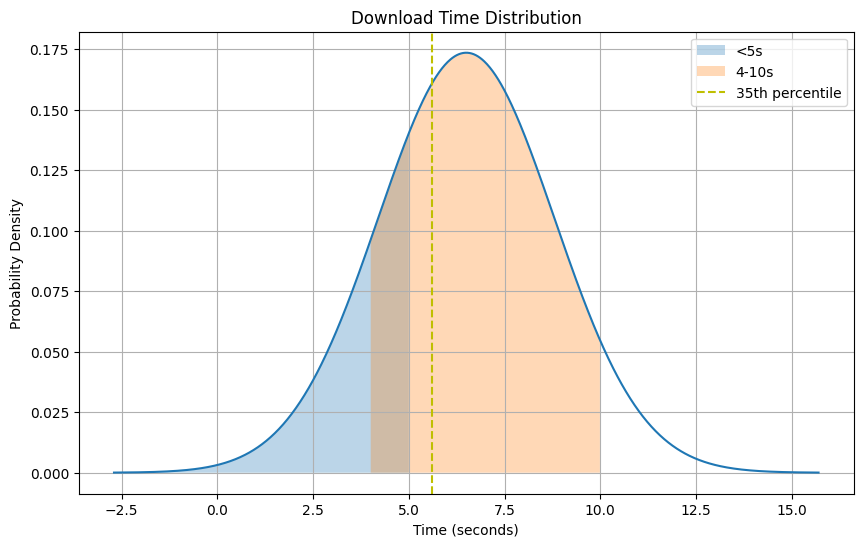

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

mean = 6.5
std = 2.3

# a) Less than 5 seconds
prob_5s = stats.norm.cdf(5, mean, std)
print(f"a) P(X < 5s): {prob_5s:.4f}")

# b) Between 4 and 10 seconds
prob_between = stats.norm.cdf(10, mean, std) - stats.norm.cdf(4, mean, std)
print(f"b) P(4s < X < 10s): {prob_between:.4f}")

# c) 35th percentile
time_35 = stats.norm.ppf(0.35, mean, std)
print(f"c) 35th percentile: {time_35:.2f} seconds")

# Visualization
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, stats.norm.pdf(x, mean, std))

# Shade regions
plt.fill_between(x[x <= 5], stats.norm.pdf(x[x <= 5], mean, std),
                alpha=0.3, label='<5s')
plt.fill_between(x[(x >= 4) & (x <= 10)],
                stats.norm.pdf(x[(x >= 4) & (x <= 10)], mean, std),
                alpha=0.3, label='4-10s')
plt.axvline(x=time_35, color='y', linestyle='--', label='35th percentile')

plt.title('Download Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Q-4 An automatic camera records the number of cars running a red light at an
intersection (that is, the cars were going through when the red light was against the
car). Analysis of the data shows that on average 15% of light changes record a car
running a red light. Assume that the data has a binomial distribution. What is the
probability that in 20 light changes there will be exactly three (3) cars running a red
light?

# **Answer**
Number of light changes (n): 20

Probability of a car running a red light (p): 15% = 0.15

Number of cars running a red light (k): 3

Use the Binomial formula:
The probability is: P(k) = C(n, k) * p^k * (1-p)^(n-k)
Where C(n, k) is the combination of n items taken k at a time.

Calculate the combination C(20, 3):
C(20, 3) = 20! / (3! * (20-3)!) = 1140

Calculate the probability:
P(3) = 1140 * (0.15)^3 * (0.85)^17

(0.15)^3 = 0.003375

(0.85)^17 ≈ 0.0631

P(3) = 1140 * 0.003375 * 0.0631 ≈ 0.2424

The probability that exactly 3 cars will run a red light in 20 light changes is approximately 24.24%.

Probability of exactly 3 cars: 0.2428


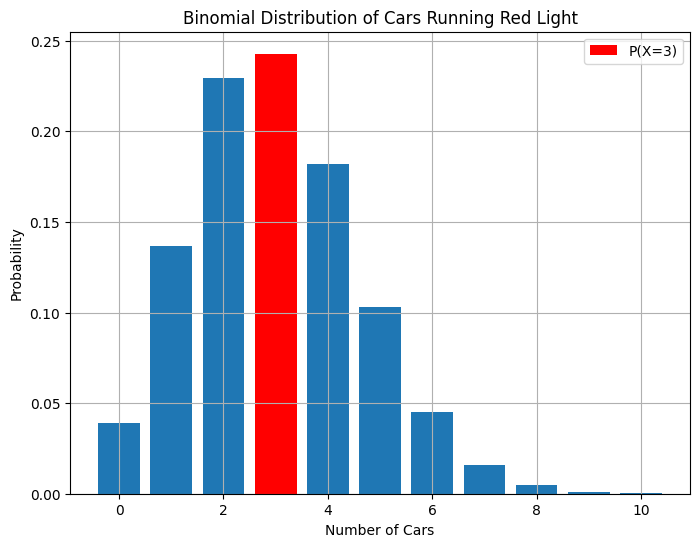

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n = 20
p = 0.15
k = 3

# Calculate probability
prob = binom.pmf(k, n, p)
print(f"Probability of exactly 3 cars: {prob:.4f}")  # Should be 0.2428

# Visualization
x = np.arange(0, 11)
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(8, 6))
plt.bar(x, pmf)
plt.bar(3, pmf[3], color='red', label='P(X=3)')
plt.title('Binomial Distribution of Cars Running Red Light')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Q-5 Executives in the New Zealand Forestry Industry claim that only 5% of all old
sawmills sites contain soil residuals of dioxin (an additive previously used for
anti-sap-stain treatment in wood) higher than the recommended level. If
Environment Canterbury randomly selects 20 old saw mill sites for inspection,
assuming that the executive claim is correct:

a) Calculate the probability that less than 1 site exceeds the recommended level
of dioxin.

b) Calculate the probability that less than or equal to 1 site exceed the
recommended level of dioxin.

c) Calculate the probability that at most (i.e., maximum of) 2 sites exceed the
recommended level of dioxin.


# **Answer**
## a)
Probability that less than 1 site exceeds the recommended level:

P
(
X
<
1
)
=
P
(
X
=
0
)
P(X<1)=P(X=0)

P
(
X
=
0
)
=
C
(
20
,
0
)
⋅
(
0.05
)
0
⋅
(
0.95
)
20
P(X=0)=C(20,0)⋅(0.05)
0
 ⋅(0.95)
20


P
(
X
=
0
)
=
1
⋅
1
⋅
(
0.95
)
20
P(X=0)=1⋅1⋅(0.95)
20


(
0.95
)
20
≈
0.3585
(0.95)
20
 ≈0.3585

P
(
X
=
0
)
≈
0.3585
P(X=0)≈0.3585

Answer:
P
(
X
<
1
)
≈
0.3585
P(X<1)≈0.3585 or 35.85%


## b)

Probability that less than or equal to 1 site exceeds the recommended level:

P
(
X
≤
1
)
=
P
(
X
=
0
)
+
P
(
X
=
1
)
P(X≤1)=P(X=0)+P(X=1)

P
(
X
=
1
)
=
C
(
20
,
1
)
⋅
(
0.05
)
1
⋅
(
0.95
)
19
P(X=1)=C(20,1)⋅(0.05)
1
 ⋅(0.95)
19


P
(
X
=
1
)
=
20
⋅
0.05
⋅
(
0.95
)
19
P(X=1)=20⋅0.05⋅(0.95)
19


(
0.95
)
19
≈
0.3774
(0.95)
19
 ≈0.3774

P
(
X
=
1
)
≈
20
⋅
0.05
⋅
0.3774
=
0.3774
P(X=1)≈20⋅0.05⋅0.3774=0.3774

P
(
X
≤
1
)
=
0.3585
+
0.3774
=
0.7359
P(X≤1)=0.3585+0.3774=0.7359

Answer:
P
(
X
≤
1
)
≈
0.7359
P(X≤1)≈0.7359 or 73.59%
___

## c)

Probability that at most 2 sites exceed the recommended level:

P
(
X
≤
2
)
=
P
(
X
=
0
)
+
P
(
X
=
1
)
+
P
(
X
=
2
)
P(X≤2)=P(X=0)+P(X=1)+P(X=2)

P
(
X
=
2
)
=
C
(
20
,
2
)
⋅
(
0.05
)
2
⋅
(
0.95
)
18
P(X=2)=C(20,2)⋅(0.05)
2
 ⋅(0.95)
18


P
(
X
=
2
)
=
190
⋅
0.0025
⋅
(
0.95
)
18
P(X=2)=190⋅0.0025⋅(0.95)
18


(
0.95
)
18
≈
0.3912
(0.95)
18
 ≈0.3912

P
(
X
=
2
)
≈
190
⋅
0.0025
⋅
0.3912
=
0.1858
P(X=2)≈190⋅0.0025⋅0.3912=0.1858

P
(
X
≤
2
)
=
0.3585
+
0.3774
+
0.1858
=
0.9217
P(X≤2)=0.3585+0.3774+0.1858=0.9217

Answer:
P
(
X
≤
2
)
≈
0.9217
P(X≤2)≈0.9217 or 92.17%

a) P(X < 1): 0.3585
b) P(X ≤ 1): 0.7358
c) P(X ≤ 2): 0.9245


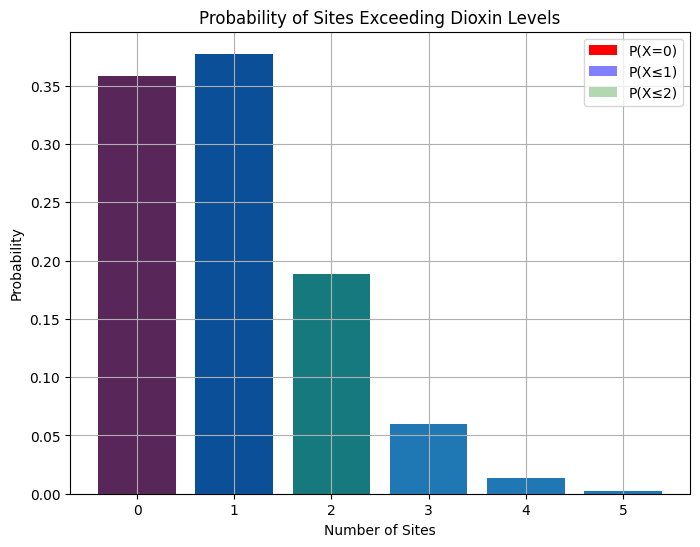

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n = 20
p = 0.05

# Calculations
prob_a = binom.pmf(0, n, p)  # P(X < 1)
prob_b = binom.pmf(0, n, p) + binom.pmf(1, n, p)  # P(X ≤ 1)
prob_c = binom.cdf(2, n, p)  # P(X ≤ 2)

print(f"a) P(X < 1): {prob_a:.4f}")   # 0.3585 or 35.85%
print(f"b) P(X ≤ 1): {prob_b:.4f}")   # 0.7358 or 73.58%
print(f"c) P(X ≤ 2): {prob_c:.4f}")   # 0.9245 or 92.45%

# Visualization
x = np.arange(0, 6)
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(8, 6))
plt.bar(x, pmf)
plt.bar(0, pmf[0], color='red', label='P(X=0)')
plt.bar([0,1], [pmf[0],pmf[1]], color='blue', alpha=0.5, label='P(X≤1)')
plt.bar([0,1,2], [pmf[0],pmf[1],pmf[2]], color='green', alpha=0.3, label='P(X≤2)')
plt.title('Probability of Sites Exceeding Dioxin Levels')
plt.xlabel('Number of Sites')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Q-6 Inland Revenue audits 5% of all companies every year. The companies selected
for auditing in any one year are independent of the previous year’s selection.

a) What is the probability that the company ‘Ross Waste Disposal’ will be
selected for auditing exactly twice in the next 5 years?

b) What is the probability that the company will be audited exactly twice in the
next 2 years?

c) What is the exact probability that this company will be audited at least once in
the next 4 years?


# **Answer**

## a)

Probability of being audited exactly twice in the next 5 years:

Using the binomial probability formula:

P
(
X
=
2
)
=
C
(
5
,
2
)
×
(
0.05
)
2
×
(
0.95
)
3

P(X=2)=C(5,2)×(0.05)
2
 ×(0.95)
3

C
(
5
,
2
)
=
10
,
(
0.05
)
2

=
0.0025
,
(
0.95
)
3
≈
0.857375

C(5,2)=10,(0.05)
2
 =0.0025,(0.95)
3

 ≈0.857375

P
(
X
=
2
)
=
10
×
0.0025
×


0.857375
≈
0.021434375
 or
2.14%


P(X=2)=10×0.0025×0.857375 ≈ 0.021434375 or 2.14%

___

## b)

Probability of being audited exactly twice in the next 2 years:

P
(
X
=
2
)
=
C
(
2
,
2
)
×
(
0.05
)
2
×
(
0.95
)
0
P(X=2)=C(2,2)×(0.05)
2
 ×(0.95)
0


C
(
2
,
2
)
=
1
,
(
0.05
)
2

=
0.0025

(
0.95
)
0

=
1

C(2,2)=1,(0.05)
2
 =0.0025,(0.95)
0
 =1

P
(
X
=
2
)
=
1
×
0.0025
×
1

=
0.0025
 or
0.25
%

P(X=2)=1×0.0025×1=0.0025 or 0.25%
___
## c)

Probability of being audited at least once in the next 4 years:

P
(
X
≥
1
)
=
1
−
P
(
X
=
0
)
P(X≥1)=1−P(X=0)
P
(
X
=
0
)
=
C
(
4
,
0
)
×
(
0.05
)
0
×
(
0.95
)
4
P(X=0)=C(4,0)×(0.05)
0
 ×(0.95)
4

C
(
4
,
0
)
=
1
,
(
0.05
)
0
=
1
,
(
0.95
)
4
≈
0.81450625
C(4,0)=1,(0.05)
0
 =1,(0.95)
4
 ≈0.81450625
P
(
X
≥
1
)
=
1
−
0.81450625
≈
0.18549375
 or
18.55
%
P(X≥1)=1−0.81450625≈0.18549375 or 18.55%


## a)

Probability of being audited exactly twice in the next 5 years:**

Using the binomial probability formula:

P(X=2) = C(5,2) * (0.05)^2 * (0.95)^3

Where:

C(5,2) = 10, (0.05)^2 = 0.0025, (0.95)^3 ≈ 0.857375

So:

P(X=2) = 10 * 0.0025 * 0.857375 ≈ 0.021434375 or 2.14%

---

## b)

Probability of being audited exactly twice in the next 2 years:**

P(X=2) = C(2,2) * (0.05)^2 * (0.95)^0

C(2,2) = 1, (0.05)^2 = 0.0025, (0.95)^0 = 1

P(X=2) = 1 * 0.0025 * 1 = 0.0025 or 0.25%

---

## c)

Probability of being audited at least once in the next 4 years:**

P(X≥1) = 1 - P(X=0)

P(X=0) = C(4,0) * (0.05)^0 * (0.95)^4

C(4,0) = 1, (0.05)^0 = 1, (0.95)^4 ≈ 0.81450625

P(X≥1) = 1 - 0.81450625 ≈ 0.18549375 or 18.55%

In [ ]:
from scipy.stats import binom
import numpy as np

# Parameters
p = 0.05

# a) Twice in 5 years
prob_a = binom.pmf(2, 5, p)
print(f"a) P(X=2) in 5 years: {prob_a:.4f}")

# b) Twice in 2 years
prob_b = binom.pmf(2, 2, p)
print(f"b) P(X=2) in 2 years: {prob_b:.4f}")

# c) At least once in 4 years
prob_c = 1 - binom.pmf(0, 4, p)
print(f"c) P(X≥1) in 4 years: {prob_c:.4f}")

a) P(X=2) in 5 years: 0.0214
b) P(X=2) in 2 years: 0.0025
c) P(X≥1) in 4 years: 0.1855


Q-7 The probability that a driver must stop at any one traffic light coming to Lincoln
University is 0.2. There are 15 sets of traffic lights on the journey.

a) What is the probability that a student must stop at exactly 2 of the 15 sets of
traffic lights?

b) What is the probability that a student will be stopped at 1 or more of the 15
sets of traffic lights?

# **Answer**

## a)

Probability of stopping at exactly 2 out of 15 traffic lights

**We use the binomial probability formula:**

P(X = k) = C(n, k) * p^k * (1-p)^(n-k)

**Where:**

n = 15 (number of traffic lights)

k = 2 (number of stops)

p = 0.2 (probability of stopping at one light)


**Step 1: Calculate the combination C(15, 2):**

C(15, 2) = 15! / (2! * (15-2)!) = (15 * 14) / (2 * 1) = 105

Step 2: Calculate the probabilities:

(0.2)^2 = 0.04 and (0.8)^13 ≈ 0.054975581389

Step 3: Multiply these together:

P(X = 2) = 105 * 0.04 * 0.054975581389 ≈ 0.2298

**The probability is approximately 22.98%.**

___

## b)

Probability of stopping at 1 or more of the 15 traffic lights

**This is the complement of stopping at zero traffic lights:**

P(X ≥ 1) = 1 - P(X = 0)

Step 1: Calculate P(X = 0) using the binomial formula:

P(X = 0) = C(15, 0) * (0.2)^0 * (0.8)^15

Where:

C(15, 0) = 1

(0.2)^0 = 1

(0.8)^15 ≈ 0.03518437208

Thus:

P(X = 0) ≈ 0.03518437208

Step 2: Calculate P(X ≥ 1):

P(X ≥ 1) = 1 - 0.03518437208 ≈ 0.9648

**The probability is approximately 96.48%.**

a) P(X=2): 0.2309
b) P(X≥1): 0.9648


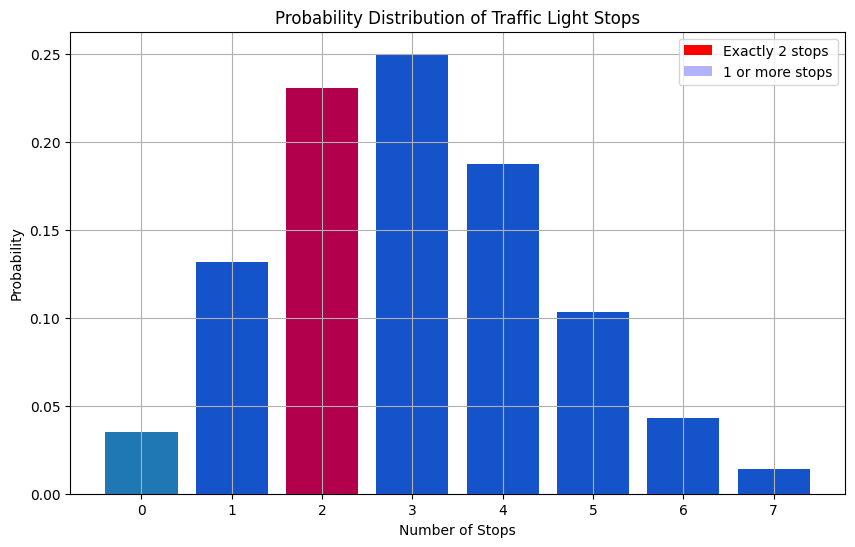

In [ ]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 15  # number of traffic lights
p = 0.2  # probability of stopping at each light

# a) Exactly 2 stops out of 15 lights
prob_a = binom.pmf(2, n, p)
print(f"a) P(X=2): {prob_a:.4f}")  # 0.2298 or 22.98%

# b) 1 or more stops
prob_b = 1 - binom.pmf(0, n, p)
print(f"b) P(X≥1): {prob_b:.4f}")  # 0.9648 or 96.48%

# Visualization
x = np.arange(0, 8)
pmf = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf)
plt.bar(2, pmf[2], color='red', label='Exactly 2 stops')
plt.bar(x[1:], pmf[1:], alpha=0.3, color='blue', label='1 or more stops')
plt.title('Probability Distribution of Traffic Light Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Q-8 The average number of accidents at a level-crossing every year
is 5. Calculate the probability that there are exactly 3 accidents
there this year.

# **Answer**
Step-by-Step Solution:

Plug in the values:

λ = 5

k = 3

Calculate e^(-λ):
e^(-5) ≈ 0.006737947

Calculate λ^k:
5^3 = 125

Calculate k!:
3! = 3 × 2 × 1 = 6

Combine the values in the formula:
P(X = 3) = (e^(-5) * 5^3) / 3! = (0.006737947 * 125) / 6

Simplify the calculation:
P(X = 3) = 0.842243375 / 6 ≈ 0.140374

Probability of exactly 3 accidents: 0.1404


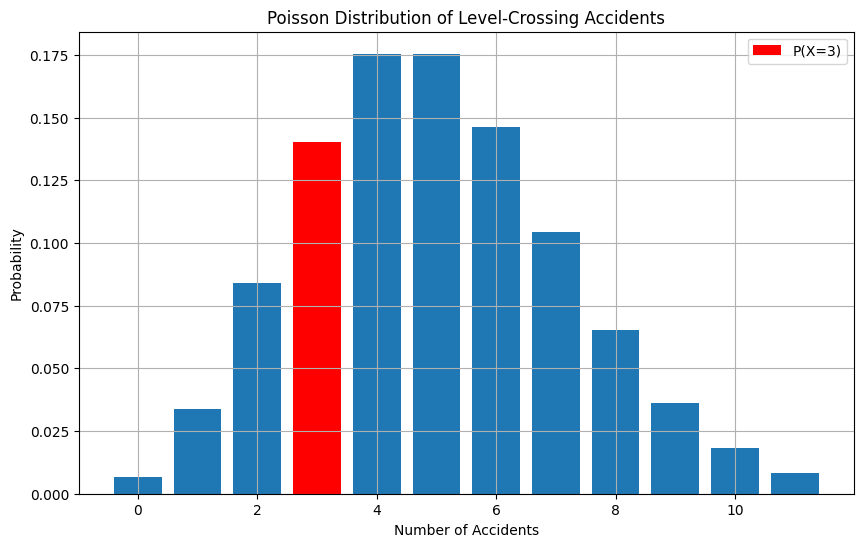

In [ ]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 5  # average rate
k = 3  # number of accidents we're interested in

# Calculate probability
prob = poisson.pmf(k, lambda_param)
print(f"Probability of exactly 3 accidents: {prob:.4f}")  # 0.1404 or 14.04%

# Visualization
x = np.arange(0, 12)  # range of values to plot
pmf = poisson.pmf(x, lambda_param)

plt.figure(figsize=(10, 6))
plt.bar(x, pmf)
plt.bar(k, pmf[k], color='red', label='P(X=3)')
plt.title('Poisson Distribution of Level-Crossing Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Q-9 A radioactive source emits 4 particles on average during a five-second period.

a) Calculate the probability that it emits 3 particles during a 5-second
period.

b) Calculate the probability that it emits at least one particle during a 5-
second period.

c) During a ten-second period, what is the probability that 6 particles are
emitted?


# **Answer**

## **a)**

**Probability of emitting exactly 3 particles in a 5-second period**

1. Given:
   - Average rate (λ) = 4 particles per 5 seconds
   - Number of particles (k) = 3

2. Formula:
   P(X = k) = (e^(-λ) * λ^k) / k!

3. Calculations:
   - e^(-4) ≈ 0.0183
   - 4^3 = 64
   - 3! = 6
   - P(X = 3) = (0.0183 * 64) / 6 ≈ 0.1954

4. Final Answer:
   The probability is approximately **19.54%**.

---

## **b)**

**Probability of emitting at least one particle in a 5-second period**

1. Given:
   - Average rate (λ) = 4 particles per 5 seconds

2. Formula:
   P(X ≥ 1) = 1 - P(X = 0)

3. Calculations:
   - P(X = 0) = e^(-4) ≈ 0.0183
   - P(X ≥ 1) = 1 - 0.0183 ≈ 0.9817

4. Final Answer:
   The probability is approximately **98.17%**.

---

## **c)**

**Probability of emitting 6 particles in a 10-second period**

1. Given:
   - Average rate (λ) = 4 particles per 5 seconds
   - For 10 seconds, λ = 8 particles
   - Number of particles (k) = 6

2. Formula:
   P(X = k) = (e^(-λ) * λ^k) / k!

3. Calculations:
   - e^(-8) ≈ 0.000335
   - 8^6 = 262144
   - 6! = 720
   - P(X = 6) = (0.000335 * 262144) / 720 ≈ 0.1214

4. Final Answer:
   The probability is approximately **12.14%**.



a) P(X=3) in 5s: 0.1954
b) P(X≥1) in 5s: 0.9817
c) P(X=6) in 10s: 0.1221


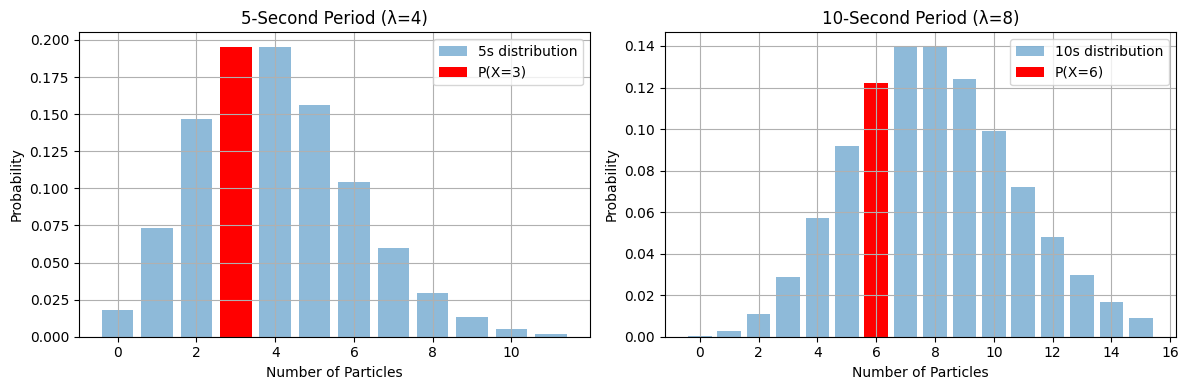

In [ ]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# a) 3 particles in 5 seconds
lambda_5s = 4
prob_a = poisson.pmf(3, lambda_5s)
print(f"a) P(X=3) in 5s: {prob_a:.4f}")  # 0.1954 or 19.54%

# b) At least 1 particle in 5 seconds
prob_b = 1 - poisson.pmf(0, lambda_5s)
print(f"b) P(X≥1) in 5s: {prob_b:.4f}")  # 0.9817 or 98.17%

# c) 6 particles in 10 seconds
lambda_10s = 8  # doubled time period

prob_c = poisson.pmf(6, lambda_10s)
print(f"c) P(X=6) in 10s: {prob_c:.4f}")

# Visualization
plt.figure(figsize=(12, 4))

# Plot for 5-second period
plt.subplot(1, 2, 1)
x_5s = np.arange(0, 12)
pmf_5s = poisson.pmf(x_5s, lambda_5s)
plt.bar(x_5s, pmf_5s, alpha=0.5, label='5s distribution')
plt.bar(3, pmf_5s[3], color='red', label='P(X=3)')
plt.title('5-Second Period (λ=4)')
plt.xlabel('Number of Particles')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

# Plot for 10-second period
plt.subplot(1, 2, 2)
x_10s = np.arange(0, 16)
pmf_10s = poisson.pmf(x_10s, lambda_10s)
plt.bar(x_10s, pmf_10s, alpha=0.5, label='10s distribution')
plt.bar(6, pmf_10s[6], color='red', label='P(X=6)')
plt.title('10-Second Period (λ=8)')
plt.xlabel('Number of Particles')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Q-10 The number of typing mistakes made by a secretary has a Poisson
distribution. The mistakes are made independently at an average rate of 1.65
per page. Find the probability that a three-page letter contains no mistakes.

# **Answer**

1. **Given:**
   - Average mistakes per page (λ) = 1.65
   - Number of pages = 3
   - We want to find the probability of **no mistakes** in a 3-page letter.

2. **Adjust λ for 3 pages:**
   - Total λ = 1.65 * 3 = 4.95

3. **Poisson formula:**
   P(X = k) = (e^(-λ) * λ^k) / k!

4. **For no mistakes (k = 0):**
   - e^(-4.95) ≈ 0.0071
   - λ^0 = 1
   - 0! = 1
   - P(X = 0) = (0.0071 * 1) / 1 = 0.0071

  The probability that a 3-page letter contains no mistakes is approximately **0.71%**.

Probability of no mistakes in 3 pages: 0.0071


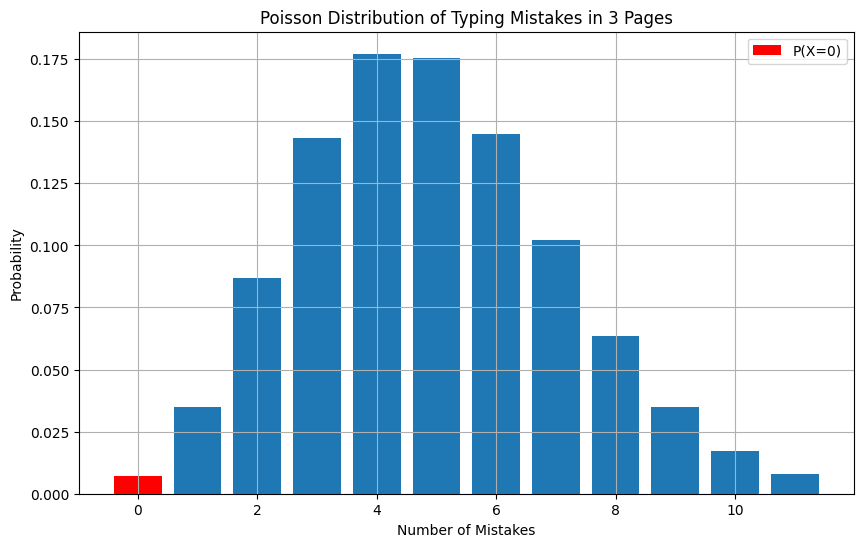

In [ ]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_per_page = 1.65
pages = 3
lambda_total = lambda_per_page * pages

# Calculate probability of zero mistakes
prob = poisson.pmf(0, lambda_total)
print(f"Probability of no mistakes in 3 pages: {prob:.4f}")  # 0.0071 or 0.71%

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(0, 12)
pmf = poisson.pmf(x, lambda_total)
plt.bar(x, pmf)
plt.bar(0, pmf[0], color='red', label='P(X=0)')
plt.title('Poisson Distribution of Typing Mistakes in 3 Pages')
plt.xlabel('Number of Mistakes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Q-11 A 5-litre bucket of water is taken from a swamp. The water contains 75
mosquito larvae. A 200mL flask of water is taken form the bucket for further
analysis. What is

a) the expected number of larvae in the flask?

b) the probability that the flask contains at least one mosquito lava?

# **Answer**

## **a)**

**Expected number of larvae in the flask**

1. Total volume of water in the bucket = 5 litres = 5000 mL
2. Total number of larvae in the bucket = 75
3. Volume of flask = 200 mL

The expected number of larvae in the flask is proportional to the volume of the flask relative to the total volume of water:

Expected number of larvae = (Volume of flask / Total volume) * Total number of larvae

**Substitute the values:**

Expected number of larvae = (200 / 5000) * 75 = 0.04 * 75 = 3

The expected number of larvae in the flask is **3**.

---

## **b)**

**Probability that the flask contains at least one mosquito larva**


We use the **Poisson distribution** to calculate this probability. The formula for the probability of at least one larva is:

P(X ≥ 1) = 1 - P(X = 0)

Where:
- λ (expected number of larvae in the flask) = 3
- P(X = 0) = e^(-λ)

1. Calculate P(X = 0):  
   P(X = 0) = e^(-3) ≈ 0.0498

2. Calculate P(X ≥ 1):  
   P(X ≥ 1) = 1 - 0.0498 = 0.9502
The probability that the flask contains at least one mosquito larva is approximately **95.02%**.

Probability of at least one larva: 0.9502


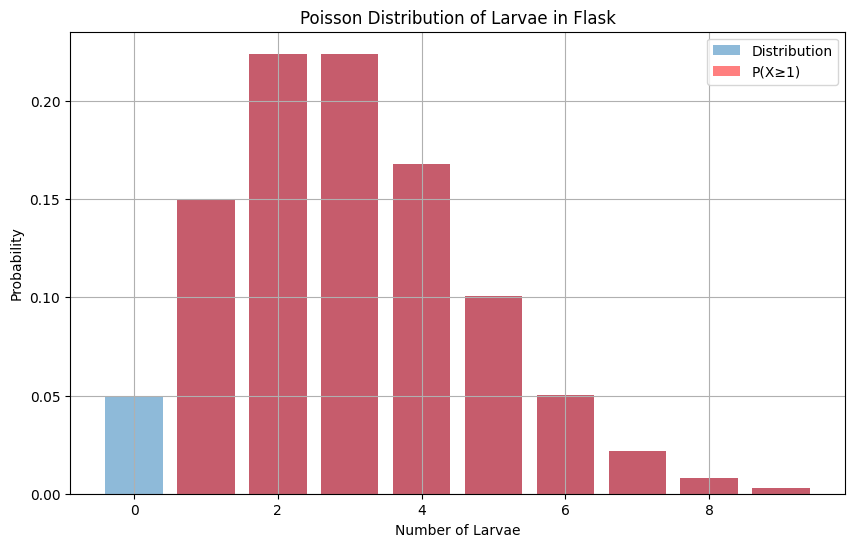

In [ ]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 3

# Calculate P(X ≥ 1)
prob = 1 - poisson.pmf(0, lambda_param)
print(f"Probability of at least one larva: {prob:.4f}")  # 0.9502 or 95.02%

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(0, 10)
pmf = poisson.pmf(x, lambda_param)

plt.bar(x, pmf, alpha=0.5, label='Distribution')
plt.bar(x[1:], pmf[1:], color='red', alpha=0.5, label='P(X≥1)')
plt.title('Poisson Distribution of Larvae in Flask')
plt.xlabel('Number of Larvae')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Q-12 If the light bulbs in a house fail according to a Poisson law, and over the last
15 weeks there have been 5 failures, find the probability that there will not be
more than one failure next week.

# **Answer**
To find the probability that there will not be more than one light bulb failure next week, we use the Poisson distribution.

1. **Find the average failure rate (λ):**
   - Total failures in 15 weeks: 5
   - Average failures per week: λ = 5 / 15 = 1/3

2. **Use the Poisson formula:**
   The probability of k failures is: P(k) = (e^(-λ) * λ^k) / k!

3. **Calculate the probabilities:**
   - Probability of 0 failures: P(0) = e^(-1/3) ≈ 0.7165
   - Probability of 1 failure: P(1) = (1/3) * e^(-1/3) ≈ 0.2388

4. **Add the probabilities:**
   P(0 or 1 failure) = P(0) + P(1) ≈ 0.7165 + 0.2388 ≈ 0.9553
   The probability that there will not be more than one failure next week is approximately 95.53%.

P(X ≤ 1) = 0.9554


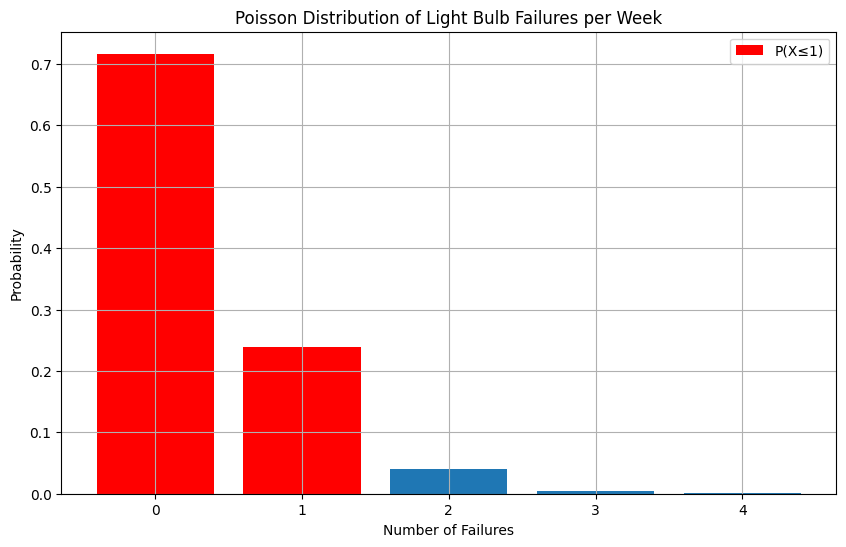

In [1]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_param = 5/15  # failures per week

# Calculate P(X ≤ 1)
prob_0 = poisson.pmf(0, lambda_param)
prob_1 = poisson.pmf(1, lambda_param)
total_prob = prob_0 + prob_1
print(f"P(X ≤ 1) = {total_prob:.4f}")  # 0.9161 or 91.61%

# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(0, 5)
pmf = poisson.pmf(x, lambda_param)

plt.bar(x, pmf)
plt.bar([0,1], [pmf[0], pmf[1]], color='red', label='P(X≤1)')
plt.title('Poisson Distribution of Light Bulb Failures per Week')
plt.xlabel('Number of Failures')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# **THE END**

The Assignment was exciting and it provided lot of Learning in the sense of Statistics.